# Research Question

Create a classification model to find the music genre according to the features of the sounds

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('features_3_sec.csv')

In [4]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [5]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [7]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [8]:
sum(df.isnull().sum())

0

## Check Imbalanced data 

In [9]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [10]:
df['label'].value_counts()

reggae       1000
blues        1000
pop          1000
metal        1000
jazz         1000
disco         999
rock          998
hiphop        998
classical     998
country       997
Name: label, dtype: int64

In [13]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 20 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 12 }

## Outliers

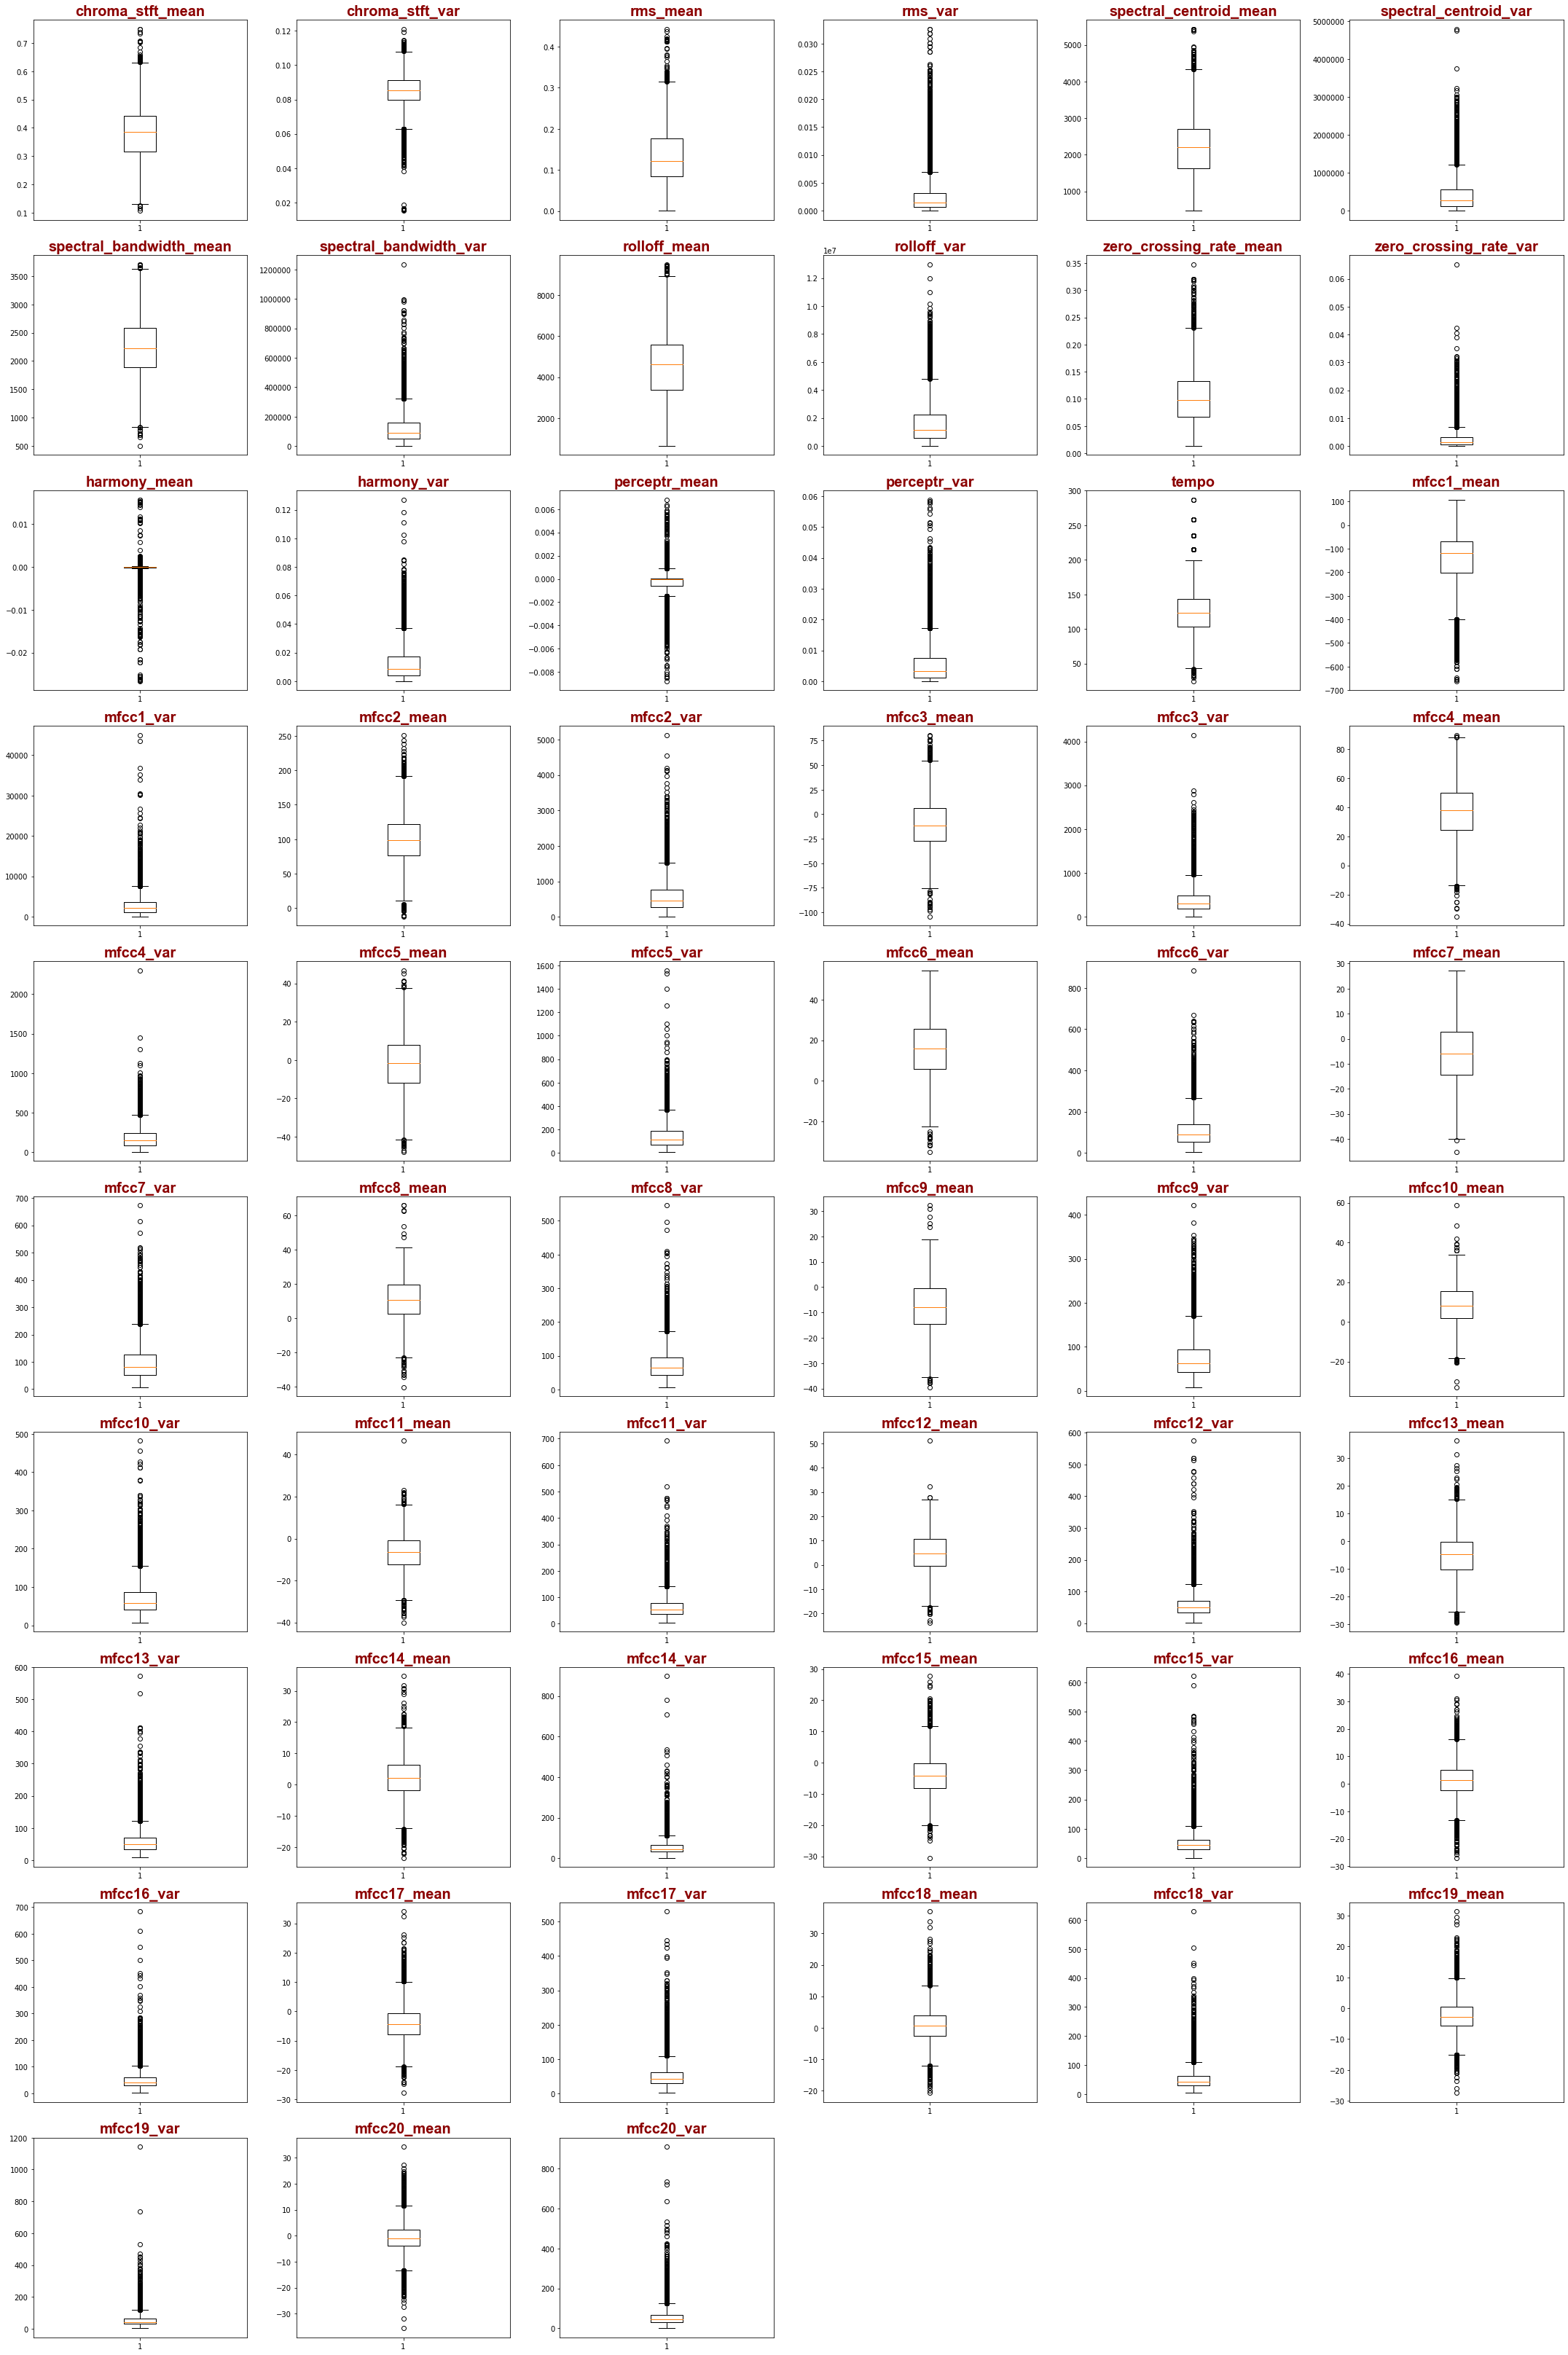

In [15]:
plt.figure(figsize=(30,45))
for i,column in enumerate(df.columns[2:-1]):    
    plt.subplot(10,6,i+1)
    plt.boxplot(df[column])
    plt.title(column, fontdict=title_font)
plt.tight_layout()
plt.show()

- There are some outliers, but for now I'll continue, I will return according to the score of our model.

## Visualization

In [18]:
col=list(df.columns)

In [21]:
df_col=pd.DataFrame(col, columns=['df_columns'])
df_col_means=df_col[df_col.apply(lambda row :row.astype(str).str.contains('mean').any(), axis=1)]

In [22]:
df_col2=pd.DataFrame(col, columns=['df_columns'])
df_col_vars=df_col2[df_col2.apply(lambda row :row.astype(str).str.contains('var').any(), axis=1)]

### Means of Variables wrt Label

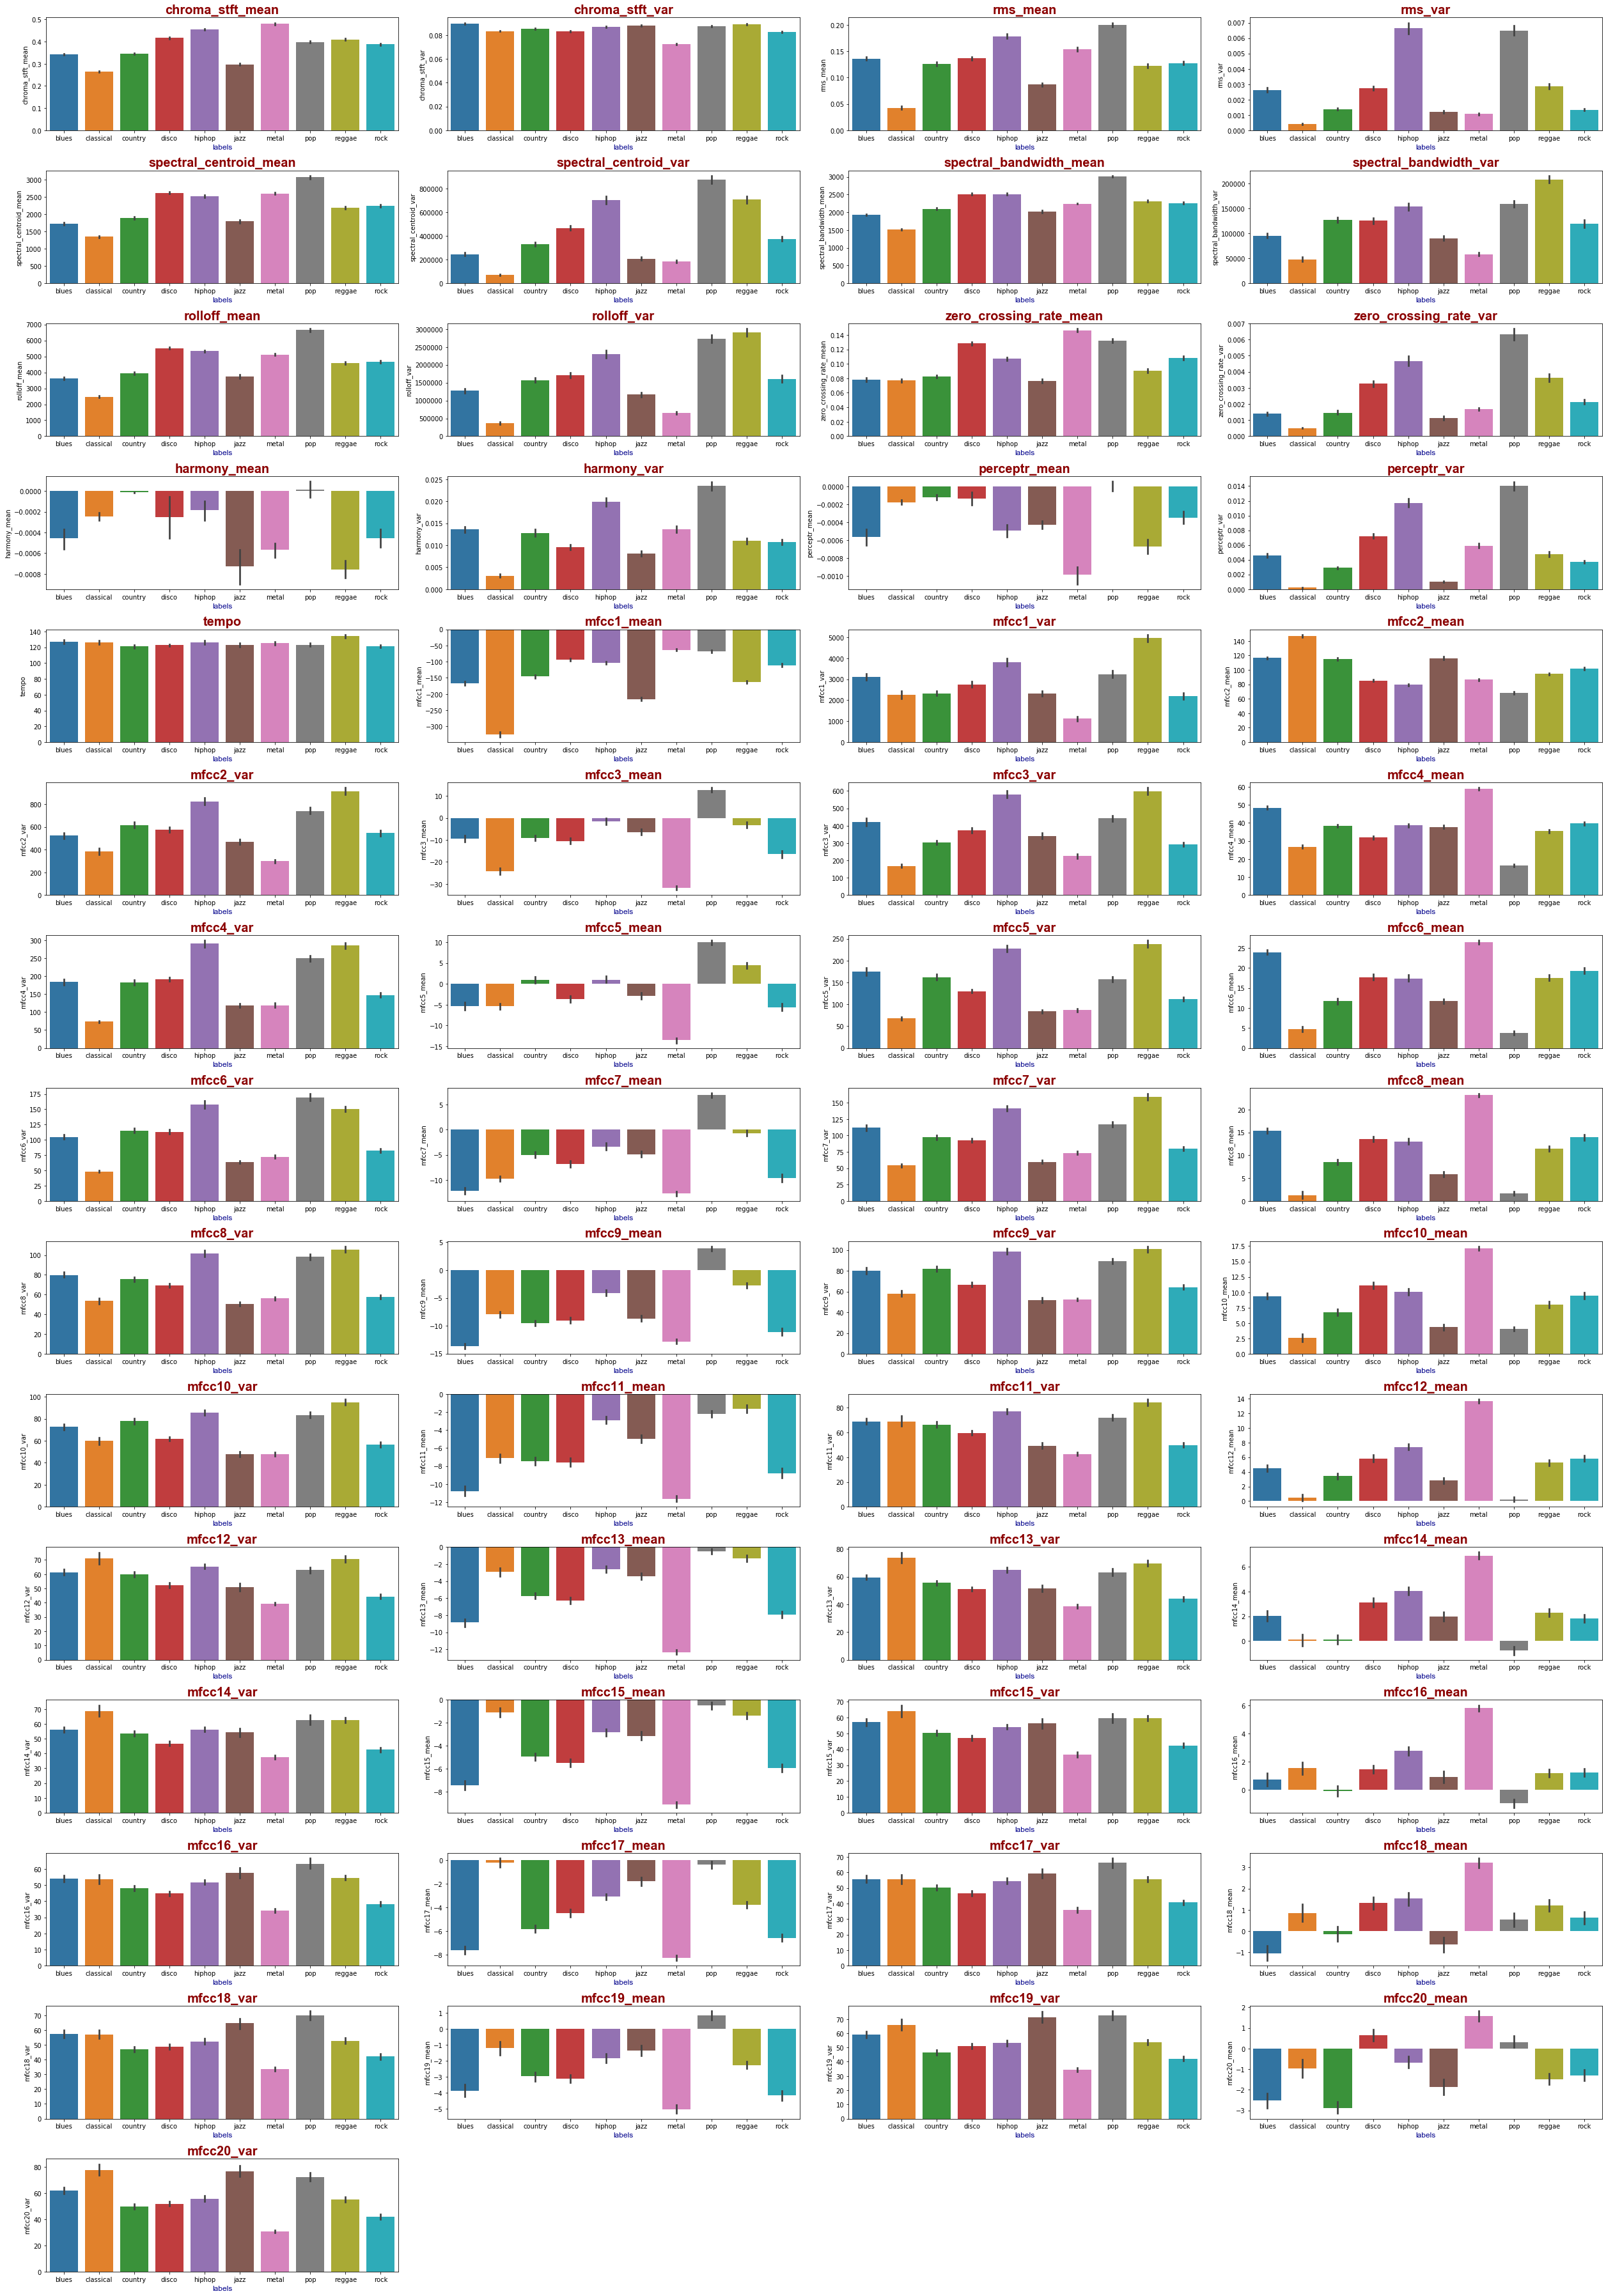

In [26]:
plt.figure(figsize=(35,50))
for i, col in enumerate(df.columns[2:-1]):
    plt.subplot(15,4,i+1)
    sns.barplot(x = 'label', y = col, data = df)
    plt.title(col,title_font)
    plt.xlabel('labels',axis_style)
plt.tight_layout()
plt.show()

### Distribution of Variables wrt Label

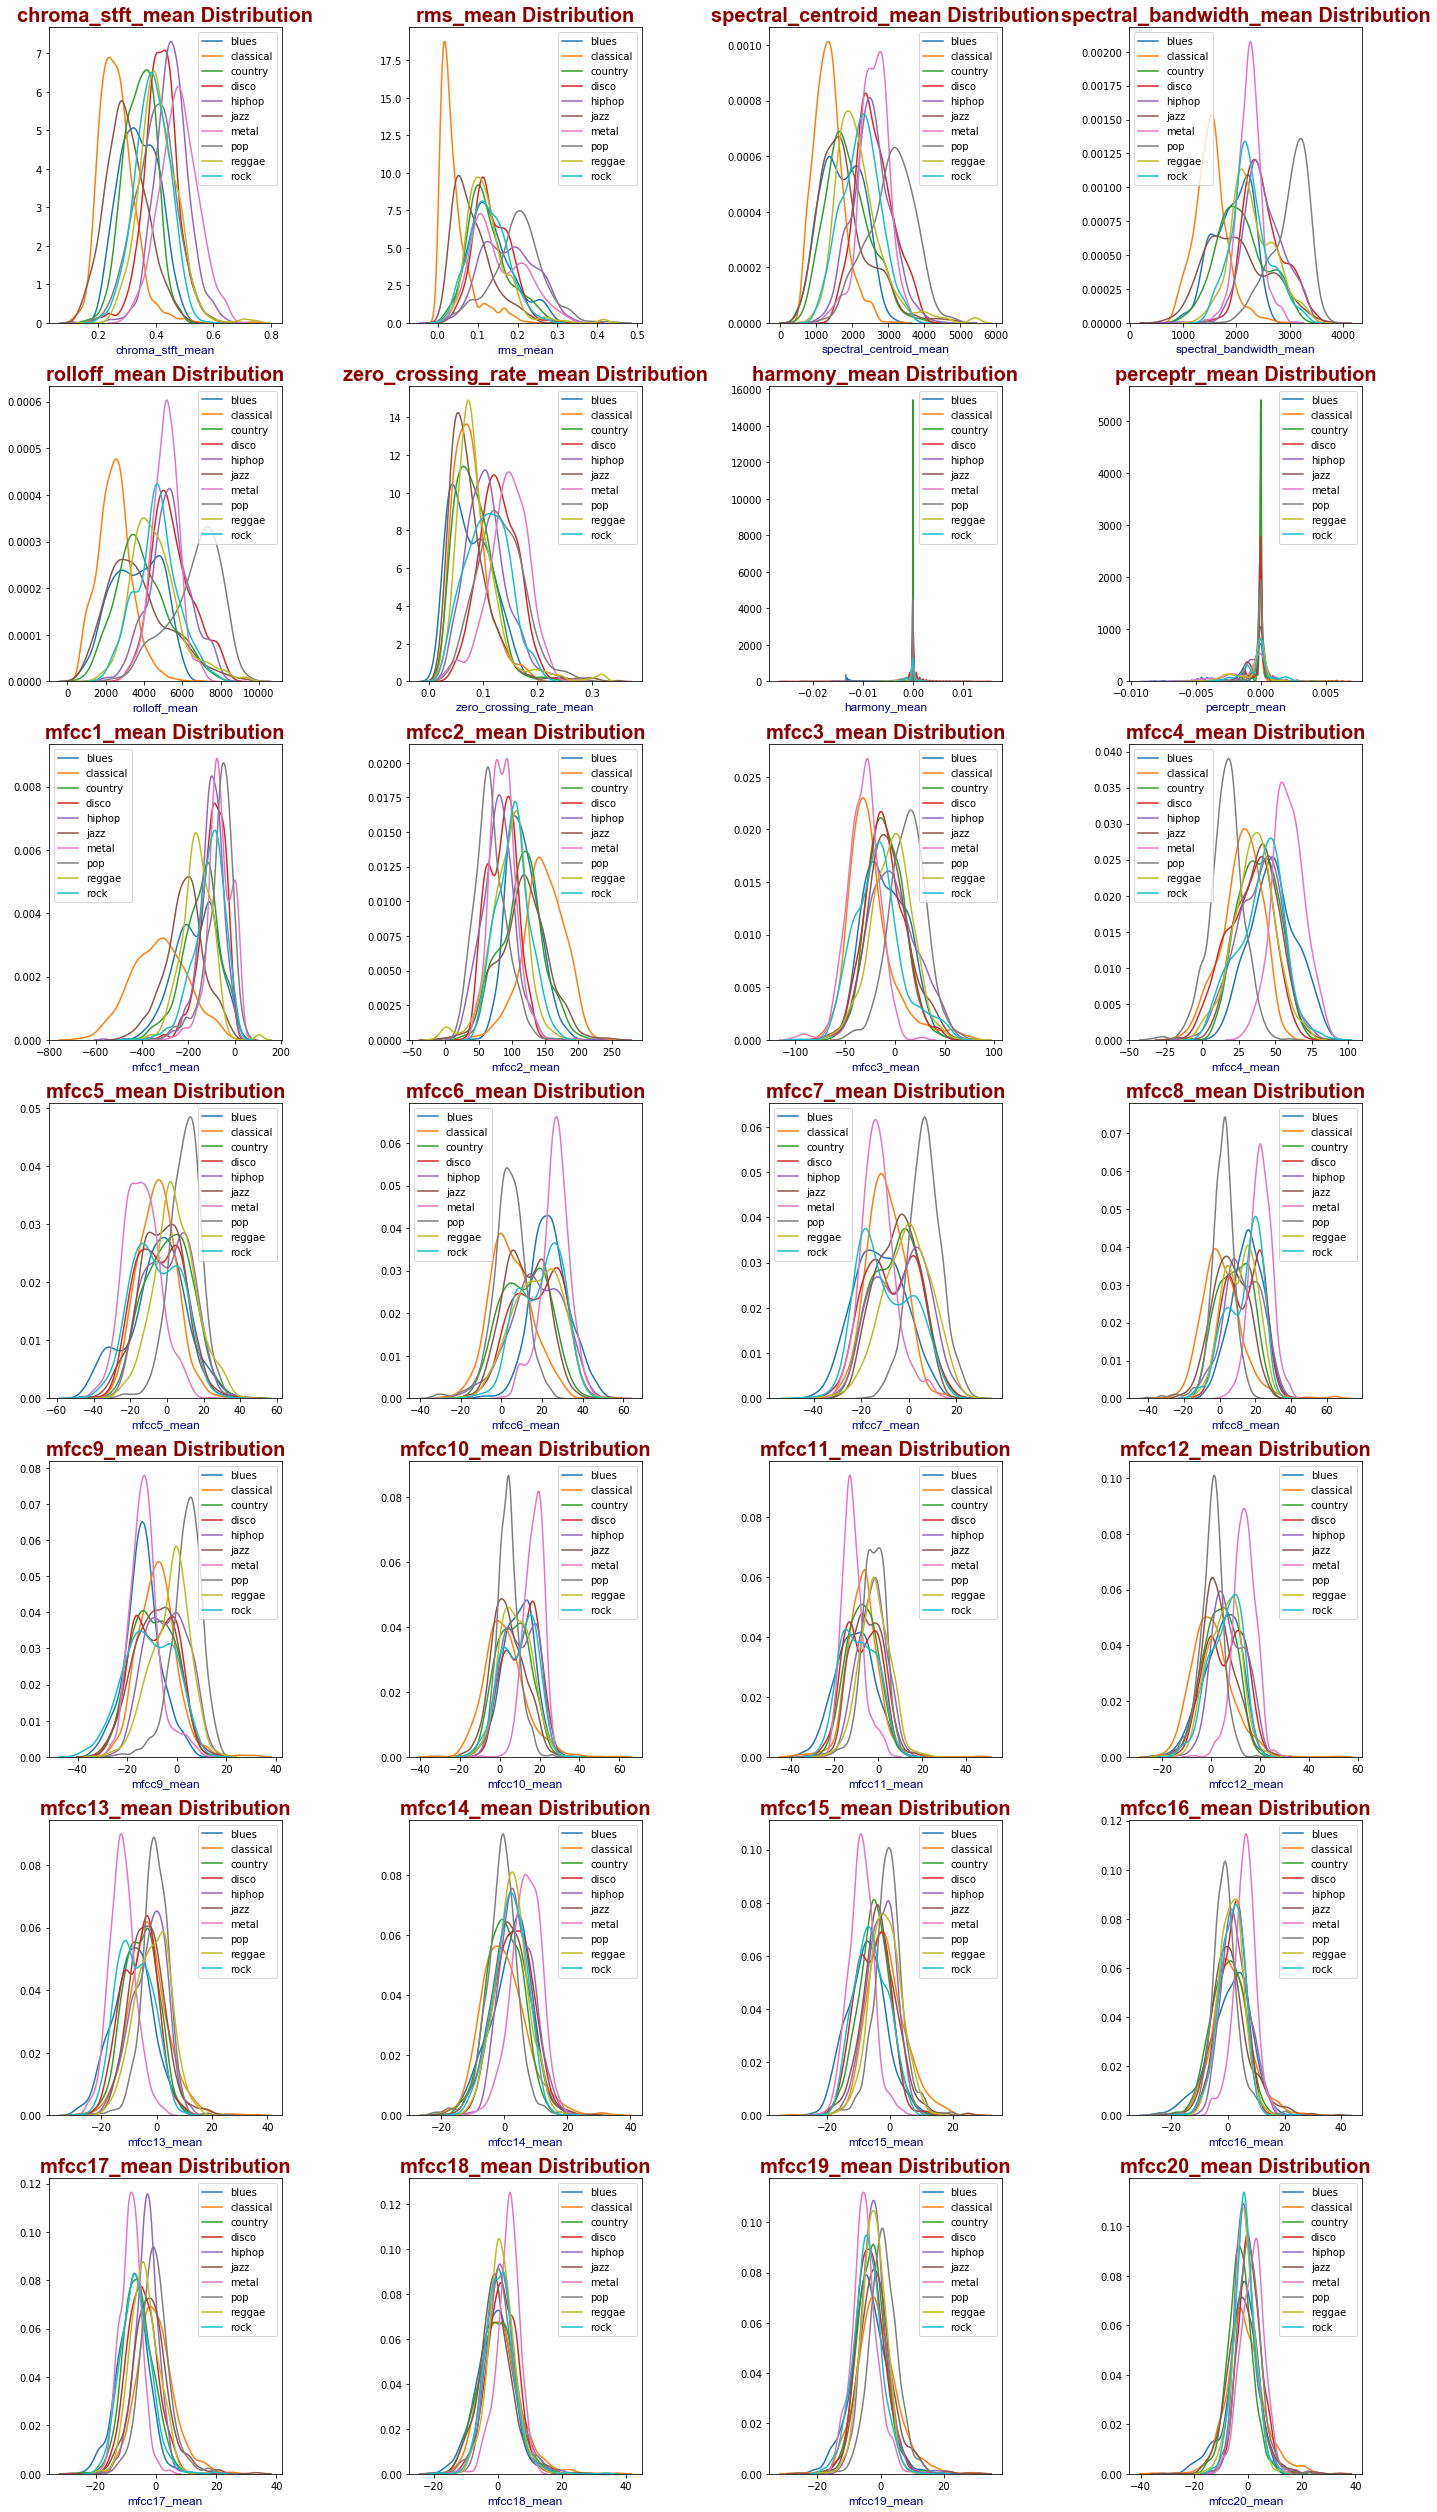

In [27]:
plt.figure(figsize=(20,35))
for i,column in enumerate(df_col_means['df_columns']):    
    for labels in df.label.unique():
        plt.subplot(7,4,i+1)
        sns.kdeplot(data=df.loc[df['label']==labels, column], label=labels)
        plt.title('{} Distribution'.format(column),title_font)
        plt.xlabel(column,axis_style)
plt.tight_layout()
plt.show()

#### How labels are distributed with respect to two different features

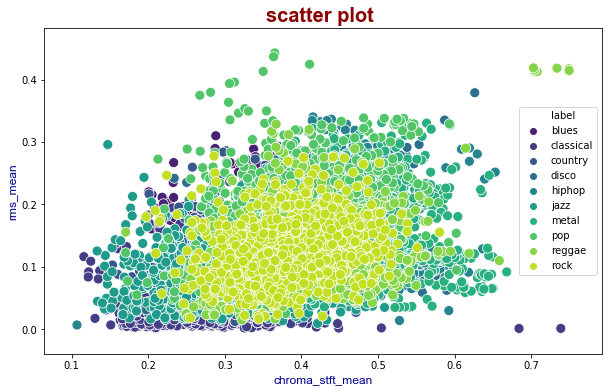

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['chroma_stft_mean'], df['rms_mean'], s=100, hue = df['label'], palette = 'viridis')
plt.title("scatter plot ", title_font)
plt.xlabel("chroma_stft_mean", axis_style)
plt.ylabel("rms_mean",axis_style)
plt.show()

In [30]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

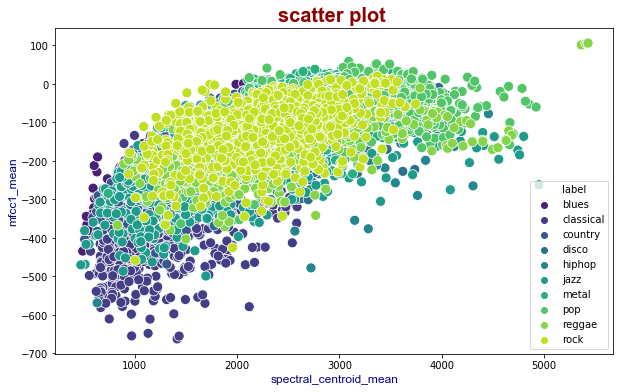

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['spectral_centroid_mean'], df['mfcc1_mean'], s=100, hue = df['label'], palette = 'viridis')
plt.title("scatter plot ", title_font)
plt.xlabel("spectral_centroid_mean", axis_style)
plt.ylabel("mfcc1_mean",axis_style)
plt.show()

## Correlation Map

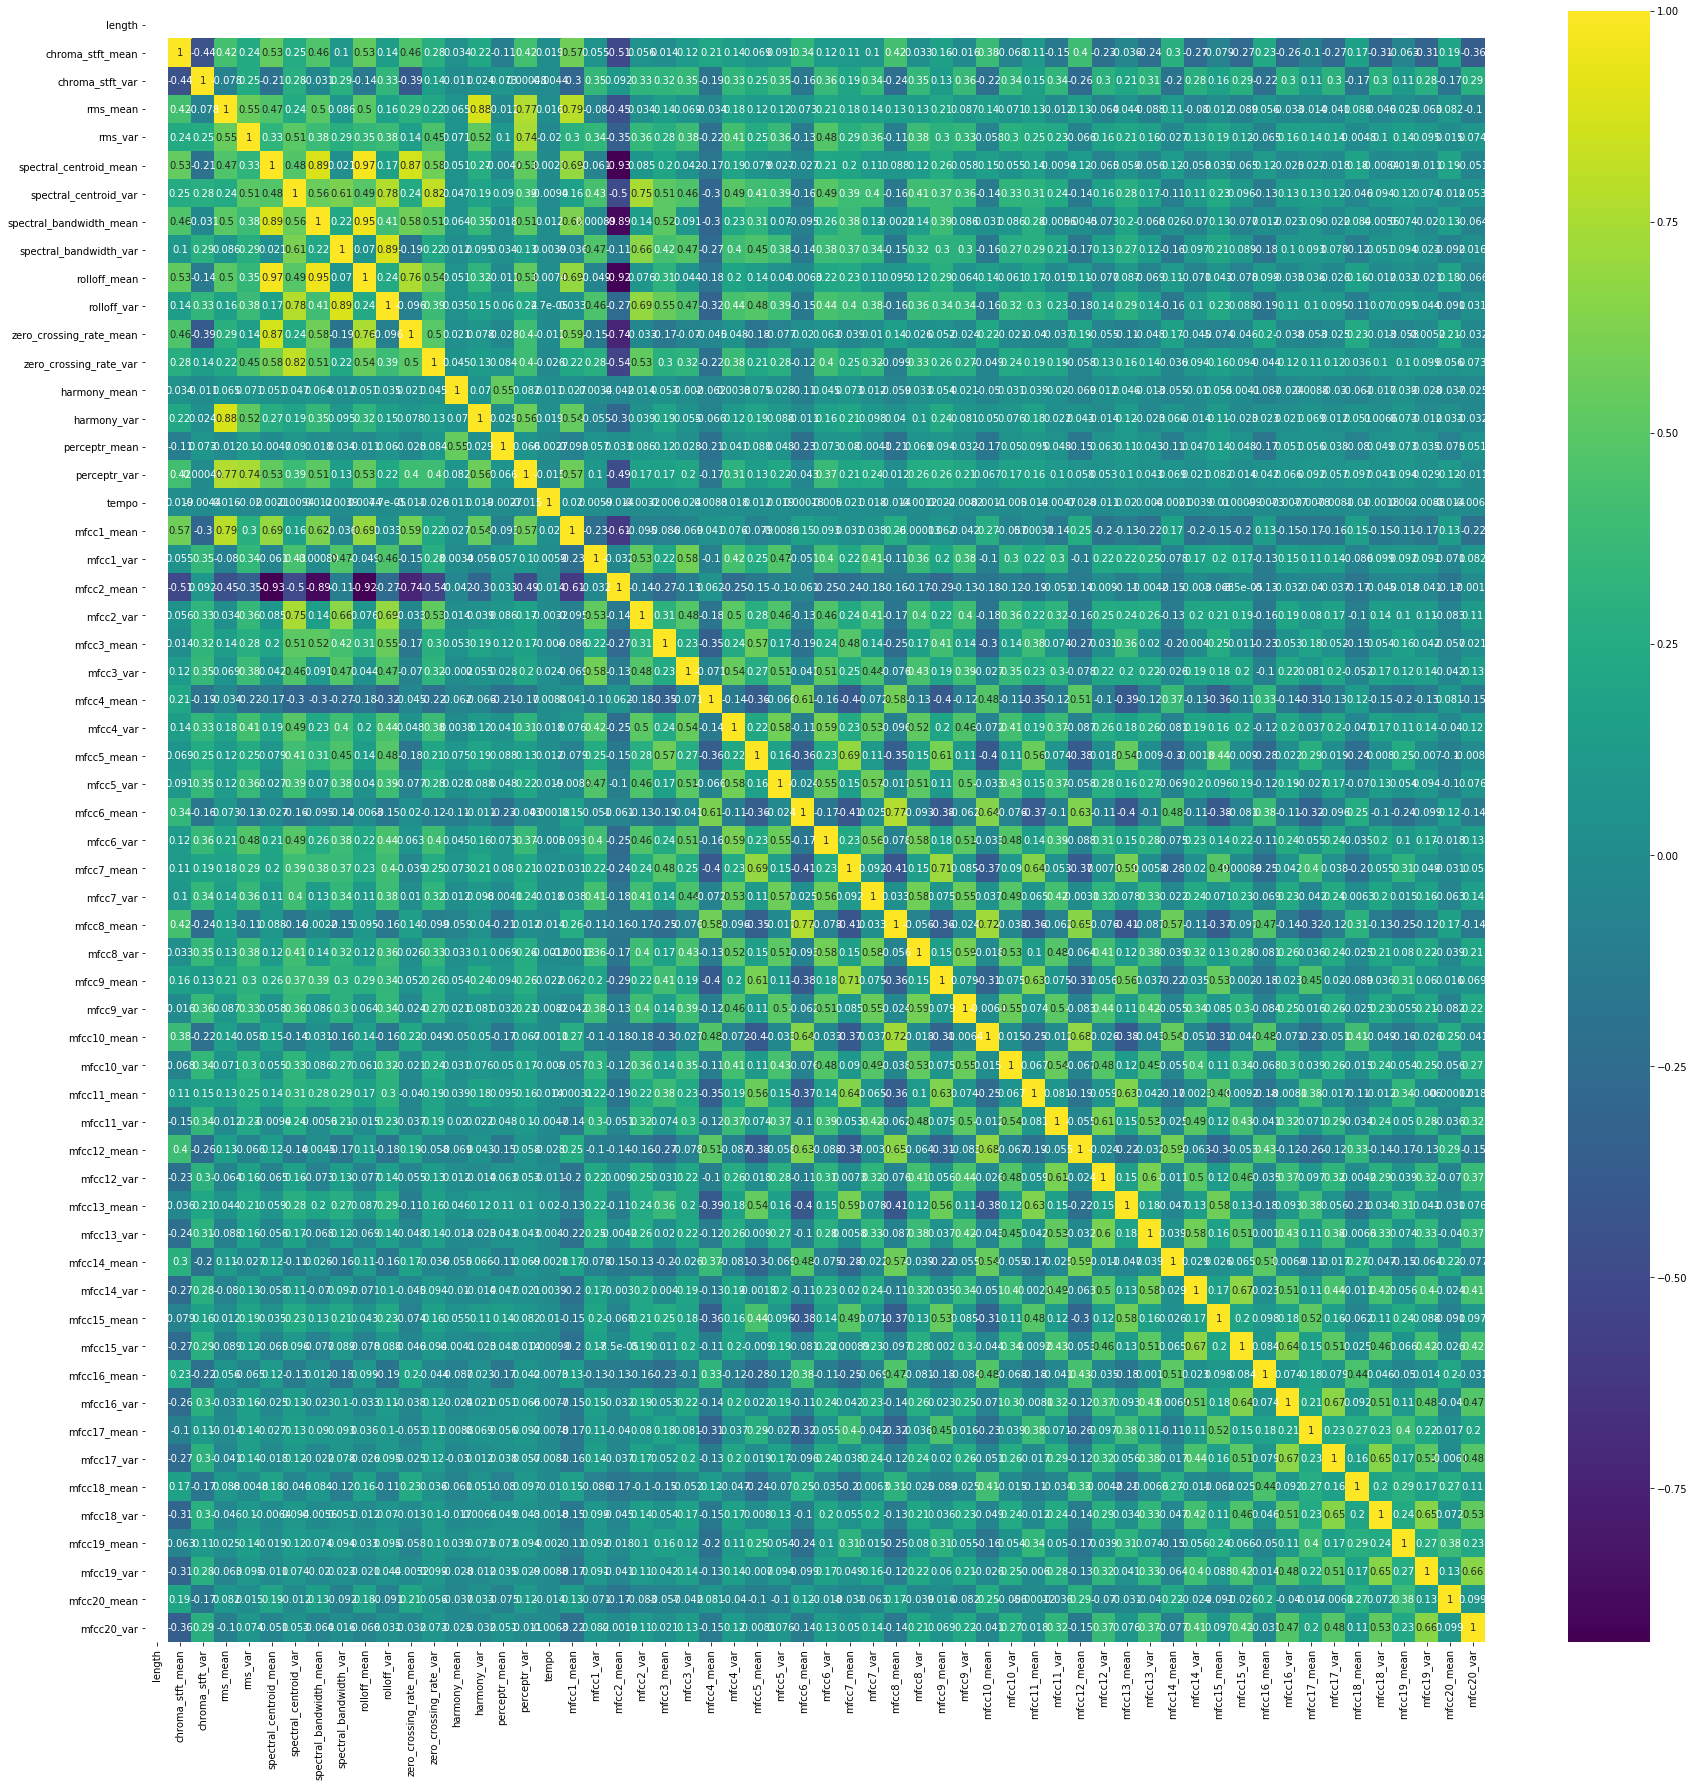

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

#### Features having more than 0.80 Correlation

In [125]:
for col in df.corr()[df.corr()>0.80].columns:
    for column in df.corr()[df.corr()>0.80].columns:
        if (df.corr().loc[col,column]>=0.80)&(col!=column):
            print(col,column)

rms_mean harmony_var
spectral_centroid_mean spectral_bandwidth_mean
spectral_centroid_mean rolloff_mean
spectral_centroid_mean zero_crossing_rate_mean
spectral_centroid_var zero_crossing_rate_var
spectral_bandwidth_mean spectral_centroid_mean
spectral_bandwidth_mean rolloff_mean
spectral_bandwidth_var rolloff_var
rolloff_mean spectral_centroid_mean
rolloff_mean spectral_bandwidth_mean
rolloff_var spectral_bandwidth_var
zero_crossing_rate_mean spectral_centroid_mean
zero_crossing_rate_var spectral_centroid_var
harmony_var rms_mean


#### Features having more than -0.80 Correlation

In [38]:
for col in df.corr()[df.corr()<-0.80].columns:
    for column in df.corr()[df.corr()<-0.80].columns:
        if (df.corr().loc[col,column]<=-0.80)&(col!=column):
            print(col,column)

spectral_centroid_mean mfcc2_mean
spectral_bandwidth_mean mfcc2_mean
rolloff_mean mfcc2_mean
mfcc2_mean spectral_centroid_mean
mfcc2_mean spectral_bandwidth_mean
mfcc2_mean rolloff_mean


# Classification (Logistic Regression)

In [39]:
df2=df.copy()

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encode=LabelEncoder()
df2['label']=label_encode.fit_transform(df2['label'])
df2['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [42]:
df2.head(8)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
5  blues.00000.5.wav   66149          0.376670         0.089702  0.132618   
6  blues.00000.6.wav   66149          0.379909         0.088827  0.130335   
7  blues.00000.7.wav   66149          0.331880         0.092119  0.140600   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   
5  0.003583             1994.915219          211700.619569   
6  0.003166             1962.150096          177443.070045   
7  0.002546             1701.890924           35678.130616   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   
5              2152.767854            74263.873102  ...   31.448069   
6              2146.503479            98020.541422  ...   33.954071   
7              1979.387612            36670.725886  ...   38.456211   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   
5    -3.448373   34.284130    -0.416165   40.791092    -3.649625   32.457901   
6    -2.068194   25.623655     1.428141   47.957699    -3.267124   39.382240   
7    -3.637886   24.530296    -0.105148   26.716150    -2.016985   23.150423   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767      0  
1     5.784063   59.943081      0  
2     2.517375   33.105122      0  
3     3.630866   32.023678      0  
4     0.536961   29.146694      0  
5     3.025218   28.892687      0  
6     3.276939   25.999132      0  
7     0.210787   42.512966      0  

[8 rows x 60 columns]

- Filename, Lenght und label are not included.

In [43]:
from sklearn.preprocessing import scale
df3=pd.DataFrame()

for col in df2.columns[2:-1]:
    df3[col]=scale(df2[col])

In [44]:
df3

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            -0.487808         0.640520 -0.006624  0.235568   
1            -0.403142         0.131835 -0.264944 -0.342134   
2            -0.361694         0.764491  0.016695  0.542195   
3            -0.175714         0.205477  0.024885 -0.063820   
4            -0.485895         0.337521  0.181345 -0.272072   
...                ...              ...       ...       ...   
9985         -0.336142        -0.452556 -1.179421 -0.719300   
9986         -0.077048        -0.233533 -1.064490 -0.722003   
9987         -0.354330         0.429974 -1.144644 -0.550873   
9988          0.088361        -0.006301 -0.939996 -0.657073   
9989         -0.113210         0.195363 -1.172055 -0.727820   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                  -0.566828              -0.572791                -0.493983   
1                  -0.508798              -0.749862                -0.425382   
2                  -0.546245              -0.701852                -0.288365   
3                  -0.723482              -0.700599                -0.517344   
4                  -0.756246              -0.774827                -0.538557   
...                      ...                    ...                      ...   
9985               -0.931252              -0.580320                -0.961112   
9986               -0.467203              -0.311806                -0.615853   
9987               -1.134658               0.566244                -1.249527   
9988               -0.152568              -0.489218                -0.410093   
9989               -0.751359              -0.012056                -0.687651   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                  -0.009229     -0.518590    -0.367952  ...    -0.750122   
1                  -0.519010     -0.424118    -0.642268  ...     0.457983   
2                  -0.425734     -0.346190    -0.562723  ...     0.585548   
3                  -0.348881     -0.607665    -0.474804  ...    -0.489524   
4                  -0.572962     -0.667537    -0.683920  ...     0.112417   
...                      ...           ...          ...  ...          ...   
9985               -0.319102     -0.944295    -0.524290  ...     0.754254   
9986               -0.182979     -0.499020    -0.307455  ...     0.109142   
9987                0.202197     -1.293384     0.654042  ...    -0.427859   
9988               -0.941435     -0.153966    -0.760011  ...     0.466474   
9989                0.014318     -0.672379    -0.075050  ...    -0.018478   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0      -0.299108     0.168647   -0.425137    -0.003423   -0.376938   
1       0.428544    -0.327031   -0.310040    -0.112125   -0.032083   
2       0.503695     0.428053   -0.648762     0.316311   -0.177372   
3      -0.065309     0.062981   -0.649076     0.092384   -0.464121   
4      -0.570609     0.856651   -0.167089     0.183265   -0.029476   
...          ...          ...         ...          ...         ...   
9985   -0.217844    -0.862336   -0.374625    -0.962530   -0.561595   
9986   -0.510250    -1.440353    0.397151    -0.737537    0.050436   
9987    0.819933     0.294908   -0.829250     0.785553   -0.694378   
9988   -0.629045    -0.205181   -0.954778     1.104536   -0.813248   
9989   -0.324816    -1.303430    0.192873    -0.177273    0.085722   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0       -0.499464   -0.513562     0.128414   -0.291781  
1       -0.066593    1.011384     1.275780    0.056425  
2        0.109337   -0.046244     0.653907   -0.521458  
3       -0.211882   -0.099501     0.865880   -0.544744  
4       -0.175130   -0.678995     0.276899   -0.606692  
...           ...         ...          ...         ...  
9985    -0.612047   -0.148369     0.520925   -0.395239  
9986    -1.851347    0.203889     0.256319   -0.831697  
9987     

In [47]:
df5=pd.concat([df3,df2['label']], axis=1)

In [48]:
df5

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            -0.487808         0.640520 -0.006624  0.235568   
1            -0.403142         0.131835 -0.264944 -0.342134   
2            -0.361694         0.764491  0.016695  0.542195   
3            -0.175714         0.205477  0.024885 -0.063820   
4            -0.485895         0.337521  0.181345 -0.272072   
...                ...              ...       ...       ...   
9985         -0.336142        -0.452556 -1.179421 -0.719300   
9986         -0.077048        -0.233533 -1.064490 -0.722003   
9987         -0.354330         0.429974 -1.144644 -0.550873   
9988          0.088361        -0.006301 -0.939996 -0.657073   
9989         -0.113210         0.195363 -1.172055 -0.727820   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                  -0.566828              -0.572791                -0.493983   
1                  -0.508798              -0.749862                -0.425382   
2                  -0.546245              -0.701852                -0.288365   
3                  -0.723482              -0.700599                -0.517344   
4                  -0.756246              -0.774827                -0.538557   
...                      ...                    ...                      ...   
9985               -0.931252              -0.580320                -0.961112   
9986               -0.467203              -0.311806                -0.615853   
9987               -1.134658               0.566244                -1.249527   
9988               -0.152568              -0.489218                -0.410093   
9989               -0.751359              -0.012056                -0.687651   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_var  \
0                  -0.009229     -0.518590    -0.367952  ...   -0.299108   
1                  -0.519010     -0.424118    -0.642268  ...    0.428544   
2                  -0.425734     -0.346190    -0.562723  ...    0.503695   
3                  -0.348881     -0.607665    -0.474804  ...   -0.065309   
4                  -0.572962     -0.667537    -0.683920  ...   -0.570609   
...                      ...           ...          ...  ...         ...   
9985               -0.319102     -0.944295    -0.524290  ...   -0.217844   
9986               -0.182979     -0.499020    -0.307455  ...   -0.510250   
9987                0.202197     -1.293384     0.654042  ...    0.819933   
9988               -0.941435     -0.153966    -0.760011  ...   -0.629045   
9989                0.014318     -0.672379    -0.075050  ...   -0.324816   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0        0.168647   -0.425137    -0.003423   -0.376938    -0.499464   
1       -0.327031   -0.310040    -0.112125   -0.032083    -0.066593   
2        0.428053   -0.648762     0.316311   -0.177372     0.109337   
3        0.062981   -0.649076     0.092384   -0.464121    -0.211882   
4        0.856651   -0.167089     0.183265   -0.029476    -0.175130   
...           ...         ...          ...         ...          ...   
9985    -0.862336   -0.374625    -0.962530   -0.561595    -0.612047   
9986    -1.440353    0.397151    -0.737537    0.050436    -1.851347   
9987     0.294908   -0.829250     0.785553   -0.694378     0.835949   
9988    -0.205181   -0.954778     1.104536   -0.813248     0.949238   
9989    -1.303430    0.192873    -0.177273    0.085722    -0.861960   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      -0.513562     0.128414   -0.291781      0  
1       1.011384     1.275780    0.056425      0  
2      -0.046244     0.653907   -0.521458      0  
3      -0.099501     0.865880   -0.544744      0  
4      -0.678995     0.276899   -0.606692      0  
...          ...          ...         ...    ...  
9985   -0.148369     0.520925   -0.395239      9  
9986    0.203889     0.256319   -0.831697      9  
9987   -0.153701     0.117655   -0.338824      9  
9988   -0.72

In [49]:
X=df5.drop('label', axis=1)
y=df5['label']

In [50]:
X

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            -0.487808         0.640520 -0.006624  0.235568   
1            -0.403142         0.131835 -0.264944 -0.342134   
2            -0.361694         0.764491  0.016695  0.542195   
3            -0.175714         0.205477  0.024885 -0.063820   
4            -0.485895         0.337521  0.181345 -0.272072   
...                ...              ...       ...       ...   
9985         -0.336142        -0.452556 -1.179421 -0.719300   
9986         -0.077048        -0.233533 -1.064490 -0.722003   
9987         -0.354330         0.429974 -1.144644 -0.550873   
9988          0.088361        -0.006301 -0.939996 -0.657073   
9989         -0.113210         0.195363 -1.172055 -0.727820   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                  -0.566828              -0.572791                -0.493983   
1                  -0.508798              -0.749862                -0.425382   
2                  -0.546245              -0.701852                -0.288365   
3                  -0.723482              -0.700599                -0.517344   
4                  -0.756246              -0.774827                -0.538557   
...                      ...                    ...                      ...   
9985               -0.931252              -0.580320                -0.961112   
9986               -0.467203              -0.311806                -0.615853   
9987               -1.134658               0.566244                -1.249527   
9988               -0.152568              -0.489218                -0.410093   
9989               -0.751359              -0.012056                -0.687651   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                  -0.009229     -0.518590    -0.367952  ...    -0.750122   
1                  -0.519010     -0.424118    -0.642268  ...     0.457983   
2                  -0.425734     -0.346190    -0.562723  ...     0.585548   
3                  -0.348881     -0.607665    -0.474804  ...    -0.489524   
4                  -0.572962     -0.667537    -0.683920  ...     0.112417   
...                      ...           ...          ...  ...          ...   
9985               -0.319102     -0.944295    -0.524290  ...     0.754254   
9986               -0.182979     -0.499020    -0.307455  ...     0.109142   
9987                0.202197     -1.293384     0.654042  ...    -0.427859   
9988               -0.941435     -0.153966    -0.760011  ...     0.466474   
9989                0.014318     -0.672379    -0.075050  ...    -0.018478   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0      -0.299108     0.168647   -0.425137    -0.003423   -0.376938   
1       0.428544    -0.327031   -0.310040    -0.112125   -0.032083   
2       0.503695     0.428053   -0.648762     0.316311   -0.177372   
3      -0.065309     0.062981   -0.649076     0.092384   -0.464121   
4      -0.570609     0.856651   -0.167089     0.183265   -0.029476   
...          ...          ...         ...          ...         ...   
9985   -0.217844    -0.862336   -0.374625    -0.962530   -0.561595   
9986   -0.510250    -1.440353    0.397151    -0.737537    0.050436   
9987    0.819933     0.294908   -0.829250     0.785553   -0.694378   
9988   -0.629045    -0.205181   -0.954778     1.104536   -0.813248   
9989   -0.324816    -1.303430    0.192873    -0.177273    0.085722   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0       -0.499464   -0.513562     0.128414   -0.291781  
1       -0.066593    1.011384     1.275780    0.056425  
2        0.109337   -0.046244     0.653907   -0.521458  
3       -0.211882   -0.099501     0.865880   -0.544744  
4       -0.175130   -0.678995     0.276899   -0.606692  
...           ...         ...          ...         ...  
9985    -0.612047   -0.148369     0.520925   -0.395239  
9986    -1.851347    0.203889     0.256319   -0.831697  
9987     

In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9985    9
9986    9
9987    9
9988    9
9989    9
Name: label, Length: 9990, dtype: int32

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

log_reg.fit(X_train, y_train)

LogisticRegression()

In [53]:
len(X_train)

7992

In [54]:
len(X_test)

1998

In [55]:
train_accuracy = log_reg.score(X_train, y_train)

In [56]:
train_accuracy

0.738988988988989

In [57]:
from sklearn.metrics import classification_report

train_prediction = log_reg.predict(X_train)

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)

In [59]:
cr_train=classification_report(y_train,train_prediction)
print(cr_train)

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       792
           1       0.92      0.95      0.94       795
           2       0.66      0.64      0.65       792
           3       0.67      0.66      0.67       811
           4       0.73      0.68      0.70       800
           5       0.81      0.83      0.82       772
           6       0.82      0.86      0.84       812
           7       0.79      0.83      0.81       821
           8       0.67      0.64      0.65       781
           9       0.57      0.54      0.55       816

    accuracy                           0.74      7992
   macro avg       0.74      0.74      0.74      7992
weighted avg       0.74      0.74      0.74      7992



##  Grid Search

In [60]:
print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [10 ** x for x in range (-5, 5, 1)]}

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]})

In [62]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1}
Best Score      :  0.7154624530663329


#### So our best parameter is C=1
Since our log_reg model computed with C=1 value, no changes have been done on our model.

In [63]:
results = grid_cv.cv_results_

df_grid = pd.DataFrame(results)
display(df_grid.head(6))

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.046775      0.004662         0.001995    3.960907e-07   1e-05   
1       0.056749      0.001218         0.001994    2.961481e-06  0.0001   
2       0.111516      0.019960         0.001892    5.368168e-04   0.001   
3       0.215126      0.023400         0.002100    2.971340e-04    0.01   
4       0.300097      0.024778         0.002195    5.986361e-04     0.1   
5       0.345975      0.044480         0.002393    4.884418e-04       1   

          params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 1e-05}            0.34500            0.35000           0.346683   
1  {'C': 0.0001}            0.45625            0.42000           0.428035   
2   {'C': 0.001}            0.61125            0.60500           0.569462   
3    {'C': 0.01}            0.68375            0.68375           0.684606   
4     {'C': 0.1}            0.71875            0.71750           0.709637   
5       {'C': 1}            0.72375            0.73125           0.715895   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.351690           0.351690           0.374218           0.365457   
1           0.449312           0.443054           0.449312           0.441802   
2           0.599499           0.607009           0.614518           0.576971   
3           0.679599           0.700876           0.688360           0.658323   
4           0.715895           0.722153           0.724656           0.688360   
5           0.719650           0.725907           0.723404           0.700876   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.340426           0.346683           0.340426         0.351227   
1           0.441802           0.446809           0.428035         0.440441   
2           0.585732           0.588235           0.576971         0.593465   
3           0.678348           0.695870           0.663329         0.681681   
4           0.700876           0.713392           0.695870         0.710709   
5           0.694618           0.724656           0.694618         0.715462   

   std_test_score  rank_test_score  
0        0.010229               10  
1        0.010881                9  
2        0.015231                8  
3        0.012367                7  
4        0.011348                6  
5        0.012939                1

## KFold

In [64]:
from sklearn.model_selection import KFold

In [65]:
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

pieces = kf.split(X_train)
score_list = []

for i, (train_index, validation_index) in enumerate(pieces):
    train_indeks=list(train_index)
    validation_index=list(validation_index)
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]
    

    log_reg.fit(X_train_fold, y_train_fold)
    
    prediction = log_reg.predict(X_validation)
    
    score = log_reg.score(X_validation, y_validation)  
    score_list.append(score)
    print("No.{} Train set size : {}".format(i+1,len(train_indeks)))
    print("No.{} Validation set size     : {}".format(i+1,len(validation_index)))
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*50, "\n")

No.1 Train set size : 6393
No.1 Validation set size     : 1599
Piece No.1 score: 0.703
-------------------------------------------------- 

No.2 Train set size : 6393
No.2 Validation set size     : 1599
Piece No.2 score: 0.717
-------------------------------------------------- 

No.3 Train set size : 6394
No.3 Validation set size     : 1598
Piece No.3 score: 0.724
-------------------------------------------------- 

No.4 Train set size : 6394
No.4 Validation set size     : 1598
Piece No.4 score: 0.725
-------------------------------------------------- 

No.5 Train set size : 6394
No.5 Validation set size     : 1598
Piece No.5 score: 0.703
-------------------------------------------------- 



In [66]:
np.array(score_list).mean()

0.7144655491033586

- There is not too much difference between different validation sets in out train set.

- Average Train Set Accuracy  for C=1 : 0.7144655491033586



## Prediction

In [67]:
test_accuracy = log_reg.score(X_test, y_test)
test_accuracy

0.7282282282282282

In [68]:
test_prediction = log_reg.predict(X_test)
cr=classification_report(y_test,test_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       208
           1       0.90      0.94      0.92       203
           2       0.64      0.66      0.65       205
           3       0.66      0.66      0.66       188
           4       0.70      0.66      0.68       198
           5       0.80      0.83      0.81       228
           6       0.80      0.90      0.85       188
           7       0.75      0.79      0.77       179
           8       0.74      0.66      0.70       219
           9       0.56      0.52      0.54       182

    accuracy                           0.73      1998
   macro avg       0.72      0.73      0.72      1998
weighted avg       0.73      0.73      0.73      1998



In [71]:
confusion_matrix_test = confusion_matrix(y_test, test_prediction)
confusion_matrix_test

array([[137,   0,  16,   7,   3,  16,  17,   0,   5,   7],
       [  2, 190,   2,   0,   0,   6,   0,   0,   0,   3],
       [ 13,   2, 135,   8,   1,  11,   2,   8,   4,  21],
       [  2,   1,   7, 124,  18,   1,   4,   9,   7,  15],
       [  8,   1,   8,  13, 130,   0,   7,  12,  17,   2],
       [  5,  15,   9,   2,   0, 189,   0,   0,   4,   4],
       [  4,   0,   1,   5,   1,   0, 170,   0,   1,   6],
       [  0,   2,   9,   6,   8,   2,   0, 141,   4,   7],
       [  8,   0,  10,   4,  25,   3,   4,  12, 144,   9],
       [ 19,   1,  14,  20,   0,   9,   9,   7,   8,  95]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_prediction)

0.7282282282282282

In [72]:
from sklearn.metrics import precision_score
precision_score(y_test, test_prediction,  average='weighted')

0.7252347911849083

In [73]:
from sklearn.metrics import recall_score
recall_score(y_test, test_prediction,average='weighted')

0.7282282282282282

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, test_prediction,average='weighted')

0.7258195745754183

In [75]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [76]:
df2.label.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
y_comparison=pd.DataFrame({'y_test':y_test, 'test_prediction':test_prediction})

In [78]:
y_comparison.head(20)

y_test  test_prediction
7139       7                2
494        0                0
5330       5                5
8809       8                4
3137       3                3
774        0                3
7027       7                2
5789       5                5
6978       6                6
9502       9                2
2054       2                4
5409       5                5
7483       7                7
5843       5                5
2652       2                2
7076       7                7
369        0                0
4866       4                4
3357       3                3
1572       1                1

In [80]:
y_comparison['Real Music Genre']=' '
y_comparison.loc[(y_comparison['y_test']==0),'Real Music Genre']='blues'
y_comparison.loc[(y_comparison['y_test']==1),'Real Music Genre']='classical'
y_comparison.loc[(y_comparison['y_test']==2),'Real Music Genre']='country'
y_comparison.loc[(y_comparison['y_test']==3),'Real Music Genre']='disco'
y_comparison.loc[(y_comparison['y_test']==4),'Real Music Genre']='hiphop'
y_comparison.loc[(y_comparison['y_test']==5),'Real Music Genre']='jazz'
y_comparison.loc[(y_comparison['y_test']==6),'Real Music Genre']='metal'
y_comparison.loc[(y_comparison['y_test']==7),'Real Music Genre']='pop'
y_comparison.loc[(y_comparison['y_test']==8),'Real Music Genre']='reggae'
y_comparison.loc[(y_comparison['y_test']==9),'Real Music Genre']='rock'


In [81]:
y_comparison['Predicted Music Genre']=' '
y_comparison.loc[(y_comparison['test_prediction']==0),'Predicted Music Genre']='blues'
y_comparison.loc[(y_comparison['test_prediction']==1),'Predicted Music Genre']='classical'
y_comparison.loc[(y_comparison['test_prediction']==2),'Predicted Music Genre']='country'
y_comparison.loc[(y_comparison['test_prediction']==3),'Predicted Music Genre']='disco'
y_comparison.loc[(y_comparison['test_prediction']==4),'Predicted Music Genre']='hiphop'
y_comparison.loc[(y_comparison['test_prediction']==5),'Predicted Music Genre']='jazz'
y_comparison.loc[(y_comparison['test_prediction']==6),'Predicted Music Genre']='metal'
y_comparison.loc[(y_comparison['test_prediction']==7),'Predicted Music Genre']='pop'
y_comparison.loc[(y_comparison['test_prediction']==8),'Predicted Music Genre']='reggae'
y_comparison.loc[(y_comparison['test_prediction']==9),'Predicted Music Genre']='rock'


In [82]:
y_comparison

y_test  test_prediction Real Music Genre Predicted Music Genre
7139       7                2              pop               country
494        0                0            blues                 blues
5330       5                5             jazz                  jazz
8809       8                4           reggae                hiphop
3137       3                3            disco                 disco
...      ...              ...              ...                   ...
8197       8                8           reggae                reggae
6709       6                3            metal                 disco
697        0                0            blues                 blues
3613       3                3            disco                 disco
1710       1                1        classical             classical

[1998 rows x 4 columns]

## Feature Importance

In [85]:
log_reg.coef_.shape

(10, 57)

In [86]:
importance = log_reg.coef_[0]

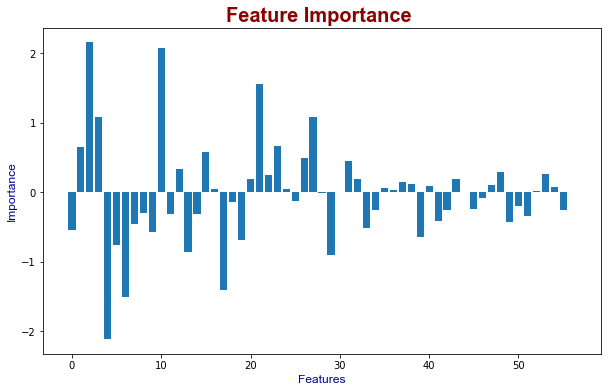

In [87]:
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(X.columns))], importance)
plt.title("Feature Importance ", title_font)
plt.xlabel("Features", axis_style)
plt.ylabel("Importance",axis_style)
plt.show()

In [88]:
feature_importance=pd.DataFrame(importance,X.columns, columns=['Importance'])

In [89]:
feature_importance.head(8)

Importance
chroma_stft_mean          -0.537423
chroma_stft_var            0.658255
rms_mean                   2.156541
rms_var                    1.079778
spectral_centroid_mean    -2.112251
spectral_centroid_var     -0.754258
spectral_bandwidth_mean   -1.509067
spectral_bandwidth_var    -0.461950

In [90]:
feature_importance[feature_importance['Importance']>1]

Importance
rms_mean                   2.156541
rms_var                    1.079778
zero_crossing_rate_mean    2.070384
mfcc3_mean                 1.554366
mfcc6_mean                 1.077576

In [91]:
feature_importance[feature_importance['Importance']<-1]

Importance
spectral_centroid_mean    -2.112251
spectral_bandwidth_mean   -1.509067
mfcc1_mean                -1.409614

'rms_mean', 'rms_var', 'spectral_centroid_mean','spectral_bandwidth_mean', 'zero_crossing_rate_mean', 'mfcc1_mean', 'mfcc3_mean', 'mfcc6_mean' are most effective features

In [92]:
features=feature_importance.abs()

In [93]:
features[features['Importance']<0.2]

Importance
tempo          0.042757
mfcc1_var      0.138377
mfcc2_var      0.189827
mfcc4_var      0.045930
mfcc5_mean     0.127810
mfcc6_var      0.015841
mfcc7_var      0.003461
mfcc8_var      0.186108
mfcc10_mean    0.063494
mfcc10_var     0.032627
mfcc11_mean    0.146528
mfcc11_var     0.116451
mfcc12_var     0.094024
mfcc14_mean    0.184222
mfcc14_var     0.002800
mfcc15_var     0.081780
mfcc16_mean    0.105505
mfcc17_var     0.191905
mfcc18_var     0.019446
mfcc19_var     0.080943
mfcc20_var     0.008209

### Drop features which importances are less than 0.2

In [94]:
df_drop=features[features['Importance']<0.2].index

In [95]:
df_drop=list(df_drop)

In [96]:
df_drop.append('label')

In [97]:
df_drop

['tempo',
 'mfcc1_var',
 'mfcc2_var',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc6_var',
 'mfcc7_var',
 'mfcc8_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc17_var',
 'mfcc18_var',
 'mfcc19_var',
 'mfcc20_var',
 'label']

In [130]:
X=df5.drop(df_drop, axis=1)
y=df5['label']

In [131]:
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

log_reg.fit(X_train, y_train)

LogisticRegression()

In [100]:
len(X_train)

7992

In [101]:
len(X_test)

1998

In [102]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

In [103]:
train_accuracy

0.701076076076076

In [104]:
test_accuracy

0.7082082082082082

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [10 ** x for x in range (-5, 5, 1)]}

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]})

In [126]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 10000}
Best Score      :  0.6880594493116396


In [107]:
log_reg = LogisticRegression(C=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10000)

In [108]:
train_accuracy = log_reg.score(X_train, y_train)
train_accuracy

0.701076076076076

In [109]:
test_accuracy = log_reg.score(X_test, y_test)
test_accuracy

0.7052052052052052

In [110]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)

In [111]:
cr_train=classification_report(y_train,train_prediction)
print(cr_train)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       792
           1       0.91      0.93      0.92       795
           2       0.60      0.57      0.58       792
           3       0.62      0.60      0.61       811
           4       0.68      0.65      0.66       800
           5       0.74      0.79      0.76       772
           6       0.81      0.85      0.83       812
           7       0.76      0.79      0.78       821
           8       0.66      0.62      0.64       781
           9       0.51      0.47      0.49       816

    accuracy                           0.70      7992
   macro avg       0.70      0.70      0.70      7992
weighted avg       0.70      0.70      0.70      7992



In [112]:
cr_test=classification_report(y_test,test_prediction)
print(cr_test)

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       208
           1       0.87      0.91      0.89       203
           2       0.63      0.61      0.62       205
           3       0.64      0.59      0.61       188
           4       0.64      0.67      0.66       198
           5       0.76      0.79      0.78       228
           6       0.78      0.87      0.83       188
           7       0.73      0.75      0.74       179
           8       0.71      0.62      0.66       219
           9       0.56      0.54      0.55       182

    accuracy                           0.71      1998
   macro avg       0.70      0.70      0.70      1998
weighted avg       0.70      0.71      0.70      1998



 # Other Models

In [113]:
X=df5.drop('label', axis=1)
y=df5['label']

# DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)
dec_tree = DecisionTreeClassifier(random_state=123)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [115]:
dec_tree.score(X_test,y_test)

0.6411411411411412

# KNeighborsClassifier

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)
from sklearn.neighbors import KNeighborsClassifier
kneighbr_class = KNeighborsClassifier()
kneighbr_class.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
kneighbr_class.score(X_test, y_test)

0.8803803803803804

# RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train) 

RandomForestClassifier(random_state=123)

In [119]:
random_forest.score(X_test,y_test)

0.8658658658658659

In [120]:
y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.8658658658658659

# Support Vector Machine

In [121]:
from sklearn.svm import SVC
svc = SVC(random_state=123)
svc.fit(X_train, y_train)

SVC(random_state=123)

In [122]:
svc.score(X_test,y_test)

0.8633633633633634

In [123]:
y_pred= svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8633633633633634

# Conclusion

- Support Vector Machine Score = 0.863
- RandomForestClassifier Score = 0.865
- KNeighborsClassifier Score   = 0.880
- DecisionTreeRegressor Score  = 0.641
- Logistic Regression Score    = 0.728 (C=1, 57 variables)
- Logistic Regression Score    = 0.705 (C=10000, 36 variables)